In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.formula.api as sm

# OBP 등 세부 지표는 2002년부터 기록되어 있으므로 2002년 이상의 시즌에서 뛴 선수만 채택
team_batiing = pd.read_excel('1982_2017_hitter_halfmab.xlsx')
team_batiing_2002 = team_batiing[team_batiing['season'] > 2002]
team_batiing_2002['BB/PA'] = team_batiing_2002['BB']/team_batiing_2002['PA']
team_batiing_2002['HR/PA'] = team_batiing_2002['HR']/team_batiing_2002['PA']

C:\Users\wprkff.DESKTOP-4NRCJTN\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\wprkff.DESKTOP-4NRCJTN\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [2]:
#train과 test를 2:1의 비로 랜덤으로 나누기 위한 과정
team_batiing_2002_random = team_batiing_2002.sample(frac=1)

#새로운 타격지표 new_value_1
new_value_1 = 0.95*team_batiing_2002_random['OBP'] + 0.93*team_batiing_2002_random['SLG'] + 0.97*team_batiing_2002_random['AVG']
team_batiing_2002_random['new_value_1'] = new_value_1

#새로운 타격지표 new_value_2
new_value_2 = 0.99*team_batiing_2002_random['RBI']+0.99*team_batiing_2002_random['R']+0.95*team_batiing_2002_random['AVG']
team_batiing_2002_random['new_value_2'] =new_value_2

team_batiing_2002_random = team_batiing_2002_random.reset_index()

                            OLS Regression Results                            
Dep. Variable:                    WAR   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1650.
Date:                Fri, 15 Dec 2017   Prob (F-statistic):          3.68e-194
Time:                        23:46:16   Log-Likelihood:                -1112.1
No. Observations:                 777   AIC:                             2228.
Df Residuals:                     775   BIC:                             2237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.8799      0.276    -32.162      

C:\Users\wprkff.DESKTOP-4NRCJTN\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'new_value_1 and WAR_test')

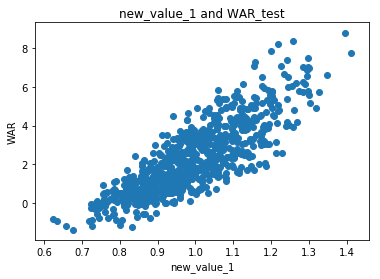

In [9]:
#전체 데이터의 2/3에 해당하는 train 데이터에 대해서 회귀분석을 training 하는 과정
train = team_batiing_2002_random[team_batiing_2002_random.index  < round(len(team_batiing_2002_random)*2/3)]
result = sm.ols(formula = 'WAR ~ new_value_1', data = train).fit()
print (result.summary())



#전체 데이터의 1/3에 해당하는 test 데이터에 대해서 위의 회귀분석 결과를 test 하는 과정

test = team_batiing_2002_random[team_batiing_2002_random.index  >= round(len(team_batiing_2002_random)*2/3) ]
test['predict_war'] = result.params[1]* test['new_value_1'] + result.params[0]  #training을 통해 얻은 회귀식
real_predict = test[['WAR','predict_war']]
real_predict
rmse_1= ((real_predict['WAR'] - real_predict['predict_war']) ** 2).mean() ** .5 #new_value1의 rmse

plt.scatter(train['new_value_1'], train['WAR'], label="data")
plt.xlabel("new_value_1")
plt.ylabel("WAR")
plt.title("new_value_1 and WAR_test")

                            OLS Regression Results                            
Dep. Variable:                    WAR   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1269.
Date:                Fri, 15 Dec 2017   Prob (F-statistic):          2.08e-165
Time:                        23:46:43   Log-Likelihood:                -1178.4
No. Observations:                 777   AIC:                             2361.
Df Residuals:                     775   BIC:                             2370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.3189      0.107    -12.281      

C:\Users\wprkff.DESKTOP-4NRCJTN\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'new_value_2 and WAR_2_test')

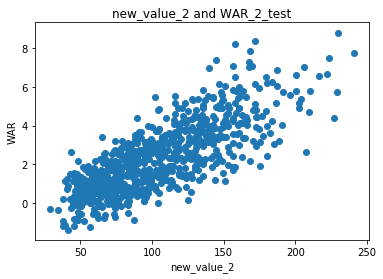

In [11]:
#전체 데이터의 2/3에 해당하는 train 데이터에 대해서 회귀분석을 training 하는 과정
train = team_batiing_2002_random[team_batiing_2002_random.index  < round(len(team_batiing_2002_random)*2/3)]
result = sm.ols(formula = 'WAR ~ new_value_2', data = train).fit()
print (result.summary())



#전체 데이터의 1/3에 해당하는 test 데이터에 대해서 위의 회귀분석 결과를 test 하는 과정

test = team_batiing_2002_random[team_batiing_2002_random.index  >= round(len(team_batiing_2002_random)*2/3) ]
test['predict_war'] = result.params[1]* test['new_value_2'] + result.params[0]
real_predict = test[['WAR','predict_war']]
real_predict
rmse_2= ((real_predict['WAR'] - real_predict['predict_war']) ** 2).mean() ** .5 #new_value1의 rmse

plt.scatter(train['new_value_2'], train['WAR'], label="data")
plt.xlabel("new_value_2")
plt.ylabel("WAR")
plt.title("new_value_2 and WAR_2_test")

In [8]:
if rmse_1 > rmse_2:
    print('new_value2 is better than new_value1')
elif rmse_1 < rmse_2:
    print('new_value1 is better than new_value2')
else:
    print('same')

new_value1 is better than new_value2
